In [ ]:
Convention: 
    - _mts: denotes a Multiple Time Series dataframe

In [1]:
import pandas as pd
import numpy as np

In [2]:
sensors = pd.read_csv('../data/01_raw/metadata/wind_turbine_data.csv', sep=';',  header = 0, names= ['id', 'power', 'commissioning_date', 'hub_height', 'diameter', 'nuts_id', 'lon', 'lat', 'NUTS1'], usecols= ['power', 'commissioning_date', 'hub_height', 'diameter', 'nuts_id', 'lon', 'lat'], parse_dates= ['commissioning_date'], infer_datetime_format= True)

In [3]:
sensors_datesorted = sensors.sort_values('commissioning_date')

In [4]:
deltas_daily_bydistrict = sensors_datesorted.groupby(by=['nuts_id', 'commissioning_date'], sort=False).agg({'power': 'sum'})

In [5]:
installed_power = deltas_daily_bydistrict.groupby('nuts_id').agg({'power': 'cumsum'})

In [6]:
installed_power_unstacked = installed_power.unstack(level='nuts_id')

display(installed_power_unstacked.head(3))
display(installed_power_unstacked.shape)

power                                                    \
nuts_id             DEF0C  DEF08  DEA43 DEF07 DEA5B DEA34 DEF0B DEE0E DE40F   
commissioning_date                                                            
1990-01-11          500.0    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1990-11-14            NaN  300.0    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1991-01-30            NaN    NaN  280.0   NaN   NaN   NaN   NaN   NaN   NaN   

                          ...                                                  \
nuts_id            DEF05  ... DE21C DE251 DE943 DE24C DE266 DEA2C DE221 DE239   
commissioning_date        ...                                                   
1990-01-11           NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1990-11-14           NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1991-01-30           NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                                
nuts_id            DE21L DE715  
commissioning_date              
1990-01-11           NaN   NaN  
1990-11-14           NaN   NaN  
1991-01-30           NaN   NaN  

[3 rows x 303 columns]

(5834, 303)

In [7]:
installed_power_mts = installed_power_unstacked.asfreq('D').ffill().fillna(value=0, axis='rows')

display(installed_power_mts.head(3))

power                                                  \
nuts_id             DEF0C DEF08 DEA43 DEF07 DEA5B DEA34 DEF0B DEE0E DE40F   
commissioning_date                                                          
1990-01-11          500.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1990-01-12          500.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1990-01-13          500.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                          ...                                                  \
nuts_id            DEF05  ... DE21C DE251 DE943 DE24C DE266 DEA2C DE221 DE239   
commissioning_date        ...                                                   
1990-01-11           0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1990-01-12           0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1990-01-13           0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                                
nuts_id            DE21L DE715  
commissioning_date              
1990-01-11           0.0   0.0  
1990-01-12           0.0   0.0  
1990-01-13           0.0   0.0  

[3 rows x 303 columns]

In [8]:
installed_power_mts = installed_power_mts.droplevel(level=0, axis='columns')

display( installed_power_mts.head(3) )
display( installed_power_mts.tail(3) )

nuts_id,DEF0C,DEF08,DEA43,DEF07,DEA5B,DEA34,DEF0B,DEE0E,DE40F,DEF05,...,DE21C,DE251,DE943,DE24C,DE266,DEA2C,DE221,DE239,DE21L,DE715
commissioning_date,,,,,,,,,,,,,,,,,,,,,
1990-01-11,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990-01-12,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990-01-13,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


nuts_id,DEF0C,DEF08,DEA43,DEF07,DEA5B,DEA34,DEF0B,DEE0E,DE40F,DEF05,...,DE21C,DE251,DE943,DE24C,DE266,DEA2C,DE221,DE239,DE21L,DE715
commissioning_date,,,,,,,,,,,,,,,,,,,,,
2017-11-29,855951.770583,487340.0,21065.0,1772350.0,260360.0,266725.0,357470.0,228175.0,881550.0,1714470.0,...,6100.0,11400.0,12000.0,10280.0,13200.0,2400.0,3300.0,16800.0,12000.0,15000.0
2017-11-30,855951.770583,487340.0,21065.0,1772350.0,260360.0,266725.0,357470.0,228175.0,881550.0,1714470.0,...,6100.0,11400.0,12000.0,10280.0,13200.0,2400.0,3300.0,16800.0,12000.0,15000.0
2017-12-01,855951.770583,487340.0,21065.0,1772350.0,260360.0,266725.0,357470.0,228175.0,881550.0,1714470.0,...,6100.0,11400.0,12000.0,10280.0,13200.0,2400.0,3300.0,16800.0,12000.0,15000.0


<AxesSubplot:xlabel='commissioning_date'>

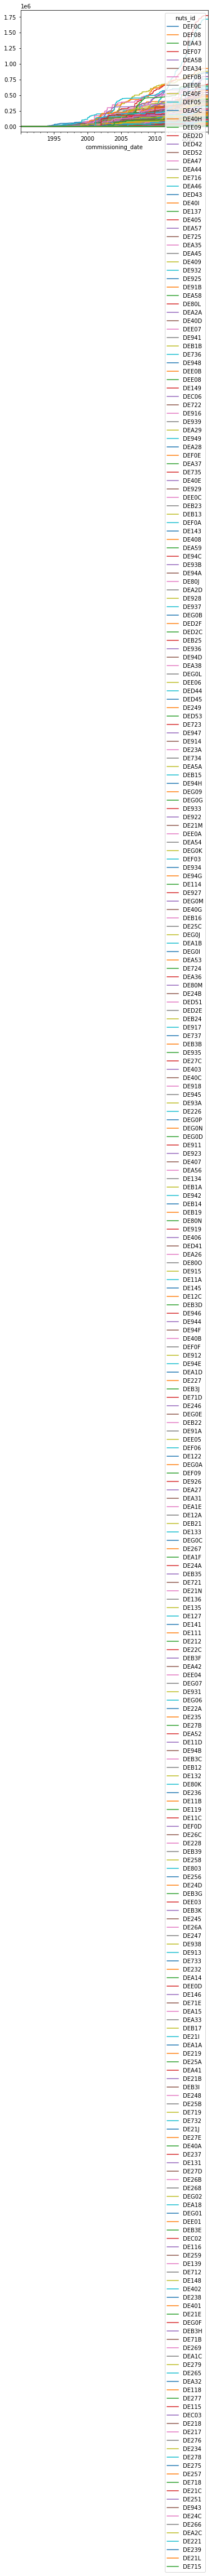

In [9]:
installed_power_mts.plot()

In [10]:
import plotly.express as px

In [11]:
fig = px.line(installed_power_mts)
fig.show()

KeyboardInterrupt: 

In [14]:
deltas_daily_bydistrict.head(3)

,,power
nuts_id,commissioning_date,
DEF0C,1990-01-11,500.0
DEF08,1990-11-14,300.0
DEA43,1991-01-30,280.0


In [36]:
deltas_mts = deltas_daily_bydistrict \
             .unstack(level='nuts_id') \
             .droplevel(level=0, axis='columns') \
             .fillna(0)
    
deltas_mts.head(3)

nuts_id,DEF0C,DEF08,DEA43,DEF07,DEA5B,DEA34,DEF0B,DEE0E,DE40F,DEF05,...,DE21C,DE251,DE943,DE24C,DE266,DEA2C,DE221,DE239,DE21L,DE715
commissioning_date,,,,,,,,,,,,,,,,,,,,,
1990-01-11,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990-11-14,0.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991-01-30,0.0,0.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Assessing Maturity Levels over time ##
### Aspect 1: how much of district installed capacity comes from a single turbine?  ###

According to this metric, a district is considered mature when a single turbine (prone to maintenance and hence to cause fluctuations in local generation) does not correspond to more than 10% of local installed capacity. 

In [39]:
deltas_cummax_mts = deltas_mts.cummax()

deltas_cummax_mts.head(3)

nuts_id,DEF0C,DEF08,DEA43,DEF07,DEA5B,DEA34,DEF0B,DEE0E,DE40F,DEF05,...,DE21C,DE251,DE943,DE24C,DE266,DEA2C,DE221,DE239,DE21L,DE715
commissioning_date,,,,,,,,,,,,,,,,,,,,,
1990-01-11,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990-11-14,500.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991-01-30,500.0,300.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='commissioning_date'>

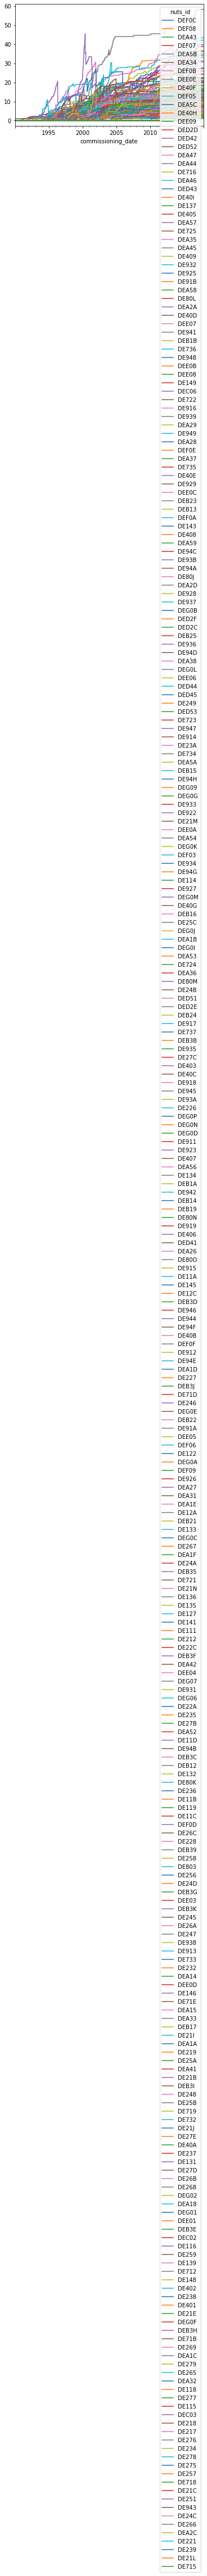

In [65]:
maturity_score_mts = installed_power_mts / deltas_cummax_mts

maturity_score_mts = maturity_score_mts \
                      .ffill() \
                      .fillna(0)

# maturity_factor_mts.head(3)
# maturity_factor_mts.tail(3)
maturity_score_mts.plot()

<AxesSubplot:xlabel='commissioning_date'>

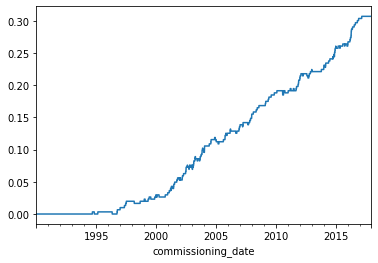

In [64]:
maturity_status = ( maturity_score_mts >= 10 ) 
shareof_mature_districts = ( maturity_status ).sum(axis='columns')  / maturity_status.shape[1]

shareof_mature_districts.plot()

### Aspect 2: number of turbines ###

Here, a district is considered mature when it has more than 10 commissioned turbines.

<AxesSubplot:xlabel='commissioning_date'>

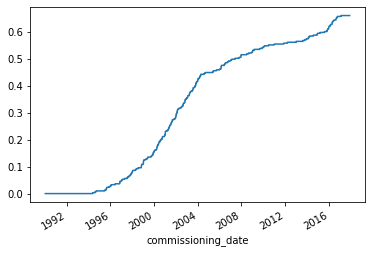

In [70]:
n_turbines_mts = (deltas_mts != 0).cumsum()
maturity_status_nt = (n_turbines_mts >= 10)
shareof_mature_districts_nt = ( maturity_status_nt ).sum(axis='columns')  / n_turbines_mts.shape[1]

shareof_mature_districts_nt.plot()

<AxesSubplot:xlabel='commissioning_date'>

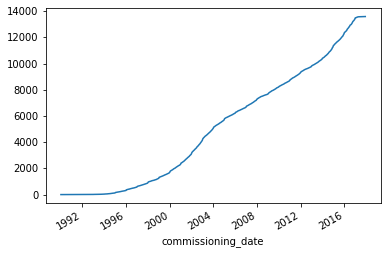

In [71]:
new_commissionings = n_turbines_mts.sum(axis='columns')

new_commissionings.plot()

Note: it would be interesting to explain the above evolutions of maturity levels in terms of technological, socio-political and socio-economical events (e.g. 2008 crisis, EU crisis, M&As).